In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
#Loading dataset
wine = pd.read_csv('../input/winequality-red.csv')

View the dataset

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


![Wine ph levels](https://media.winefolly.com/acidity-ph-level-in-wine-and-drinks.png)

We can assume to an extent that since the mean pH in the given dataset is around 3 , we have less or Red Wine samples, and more acidic wine samples such as white wines, the maximum is around 4 which indicates the presence of Red Wine samples

Viewing the data distribution of features

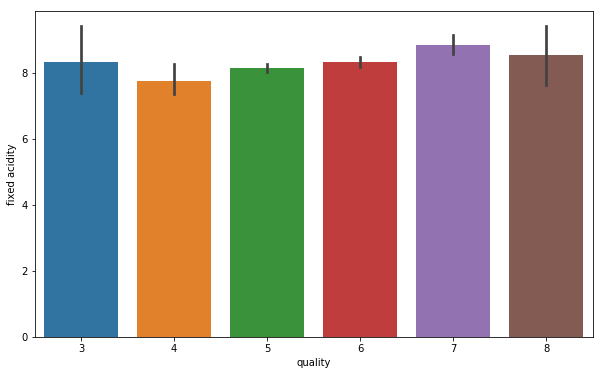

In [6]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

We see that fixed acidity does not give any specification to classify the quality.

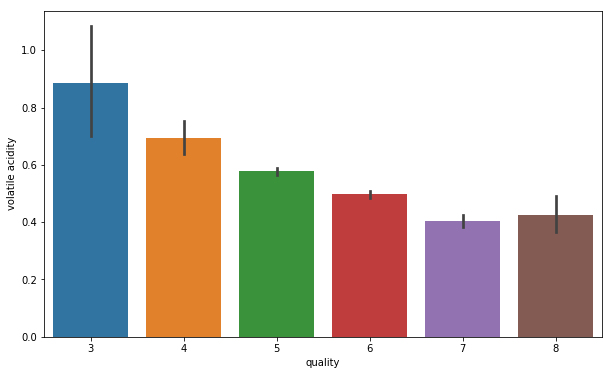

In [7]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

As quality of wine increases, it's volatile acidity decreases, This is also why our Max pH of wine is around 5.  Acidity gives a wine its tart and sour taste


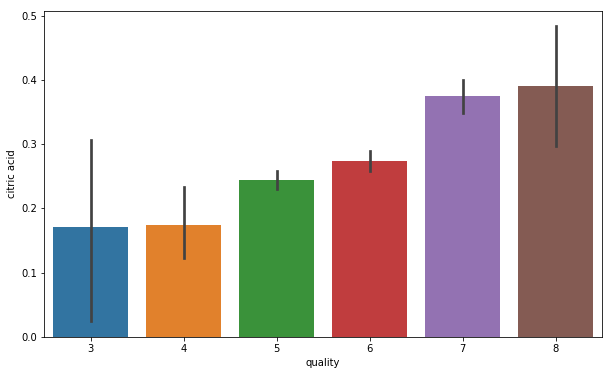

In [8]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

Citric acid is added after wine is created to increase it's acidity, to keep it more fresh. Therefore, it is obvious that quality will increase since more citric acid correspond to an fresh flavour (to an extent)


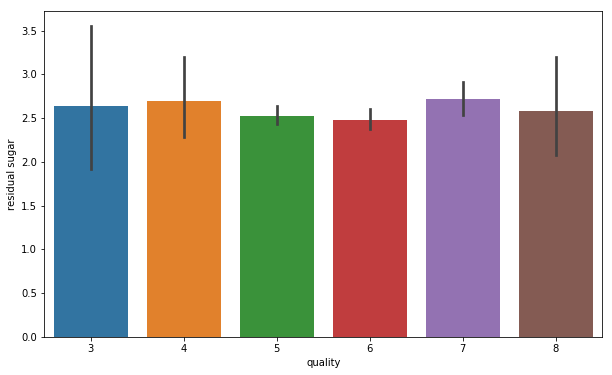

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

Residual sugar is present after the fementation process to balance the acidic flavour, around 2.5 % is fruity flavour and greater than 2.5% leads to completely sweet wine.

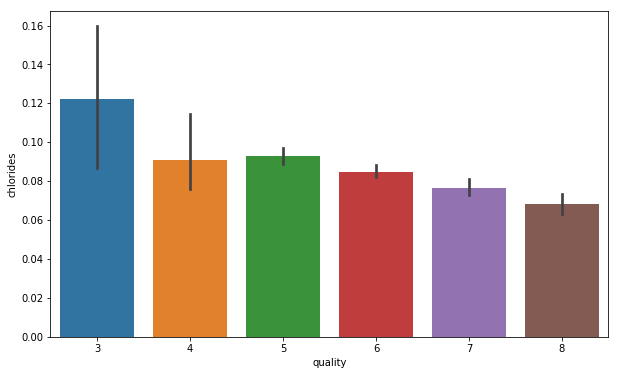

In [10]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

Chlorides are a form of electrolytes similar to Sodium. And these might bond with sodium, and this results in the 'saltiness' present in the wine. It's obvious we don't want our wine to taste salty.
The cheapest quality wine thus has more salt content.

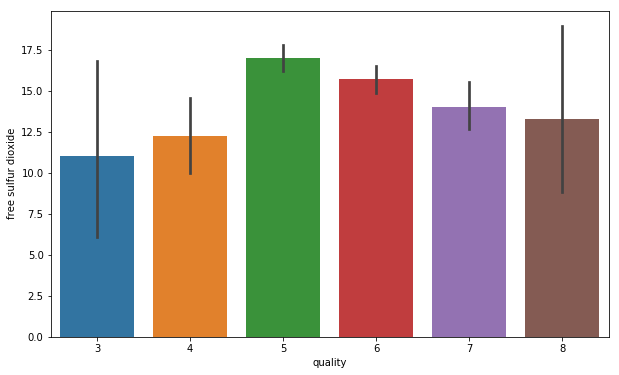

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

The S02 content is a result of addition as well inherently present in the wine making process. Less S02, indicates less addition of sulphites.

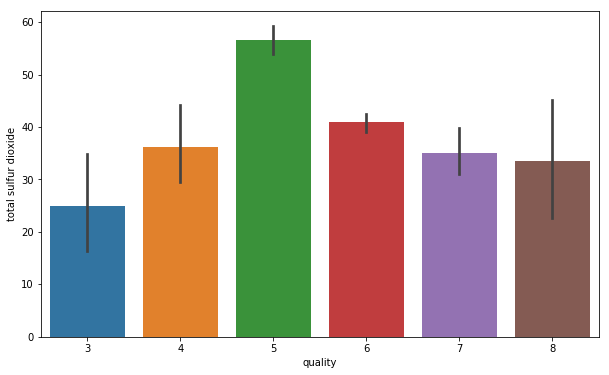

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

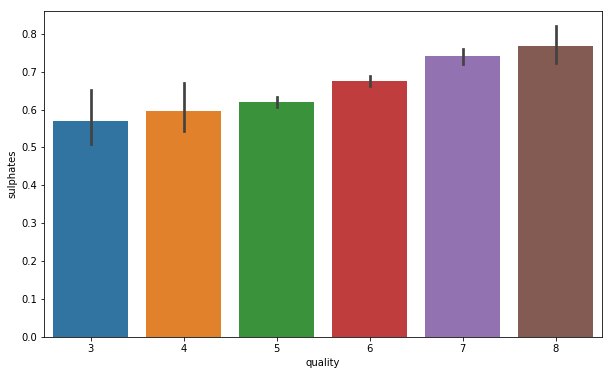

In [13]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

Sulphates are usually added for wine preservation, higher the amount of sulphates the more is the preservation of wine. In our dataset we have less red wines and thus we see have less sulphates

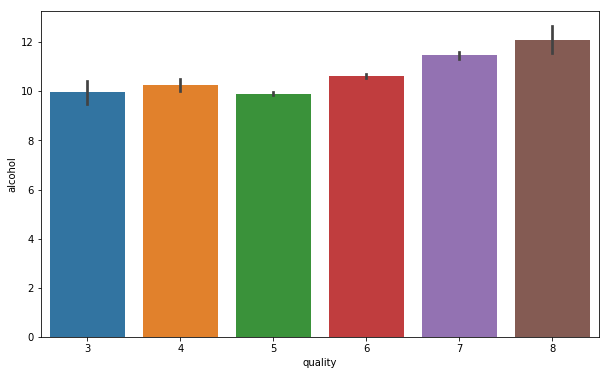

In [14]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

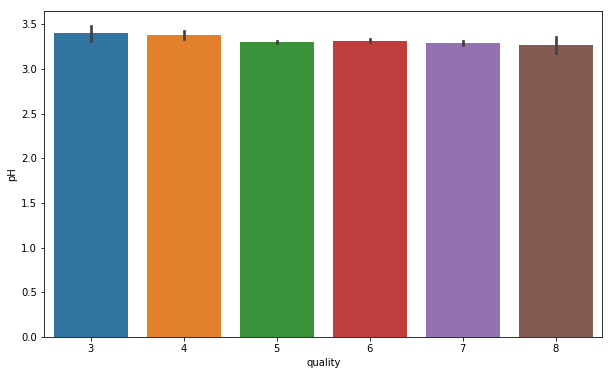

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = wine)

pH remains relatively stable , and lowers slightly as quality increases

## Preprocessing Data

In [16]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [17]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [18]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [19]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

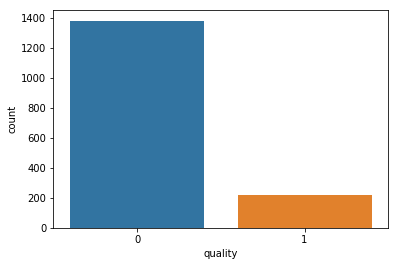

In [20]:
sns.countplot(wine['quality'])

In [21]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [22]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [24]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Random Forest Classifier

In [25]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [26]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.90      0.97      0.93       273
          1       0.69      0.38      0.49        47

avg / total       0.87      0.88      0.87       320



#### Random forest gives the accuracy of 87%

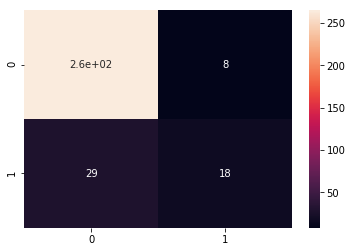

In [27]:
#Confusion matrix for the random forest classification
sns.heatmap(confusion_matrix(y_test, pred_rfc),annot=True)

## Support Vector Classifier

In [28]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [29]:
print(classification_report(y_test, pred_svc))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       273
          1       0.71      0.26      0.37        47

avg / total       0.86      0.88      0.85       320



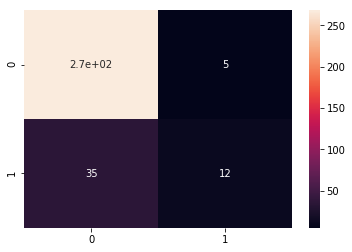

In [30]:
sns.heatmap(confusion_matrix(y_test, pred_svc),annot=True)

#### Support vector classifier gets 86%


## Grid Search CV
It is a an Optimization technique used to search all possible search spaces, or combination of hyperparameters in our case. Like a brute force method

In [31]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [32]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [33]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [34]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

             precision    recall  f1-score   support

          0       0.90      0.99      0.94       273
          1       0.89      0.34      0.49        47

avg / total       0.90      0.90      0.88       320



In [35]:
rfc_eval = cross_val_score(estimator = svc2, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.90853838582677171

### SVC improves from 86% to 90% using Grid Search CV

## Cross Validation Score for random forest 

In [36]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.90773868110236222

### Random forest accuracy increases from 87% to 91 % using cross validation score

Thus, Random Forest Classifier with 91% cross validation score is the best model to use here